# Описание
Этот набор данных содержит подробные медицинские диагностические показатели, которые были собраны для прогнозирования развития диабета на основе нескольких факторов, связанных со здоровьем. Он состоит из 768 записей о пациентках, каждая из которых характеризуется 8 атрибутами, связанными со здоровьем. Переменная «Результат» указывает, есть ли у пациентки диабет (1) или нет (0). Этот набор данных можно использовать для обучения и тестирования моделей машинного обучения для задач классификации, связанных с прогнозированием диабета.<br><br>
1) (Pregnancies) Беременности: Количество раз, когда пациентка была беременна.<br>
2) (Glucose) Глюкоза: концентрация глюкозы в плазме крови после 2-часового перорального теста на толерантность к глюкозе.<br>
3) (BloodPressure) Артериальное давление: Диастолическое артериальное давление (мм рт. ст.).<br>
4) (SkinThickness) Толщина кожи: Толщина кожной складки на трицепсе (мм).<br>
5) (Insulin) Инсулин: 2-часовой уровень инсулина в сыворотке крови (мкЕд/мл).<br>
6) (BMI) ИМТ: индекс массы тела (вес в кг/(рост в м)^2).<br>
7) (DiabetesPedigreeFunction) Функция DiabetesPedigree: функция, которая представляет родословную пациента по диабету (т. е. вероятность развития диабета на основе семейной истории).<br>
8) (Age) Возраст: Возраст пациента (годы).<br>
9) (Outcome) Результат: двоичный результат (0 или 1), где 1 означает наличие диабета, а 0 — его отсутствие.<br>

In [1]:
#Импорт бтблиотек
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
warnings.filterwarnings("ignore")

from imblearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score




In [2]:
df = pd.read_csv("diabetes_dataset.csv")

# Анализ данных

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Столбчатая диаграмма для целевой переменной

Text(0, 0.5, 'Частота')

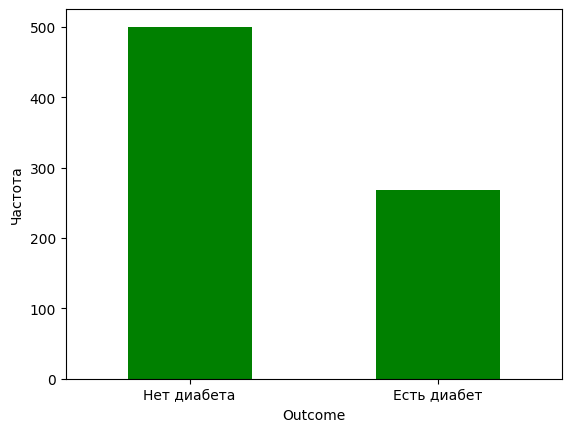

In [9]:
# Датасет немного несбалансирован
count_classes = pd.value_counts(df['Outcome'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="g")
plt.xticks(range(2), ['Нет диабета','Есть диабет'])
plt.ylabel("Частота")

Корреляционная мтарица

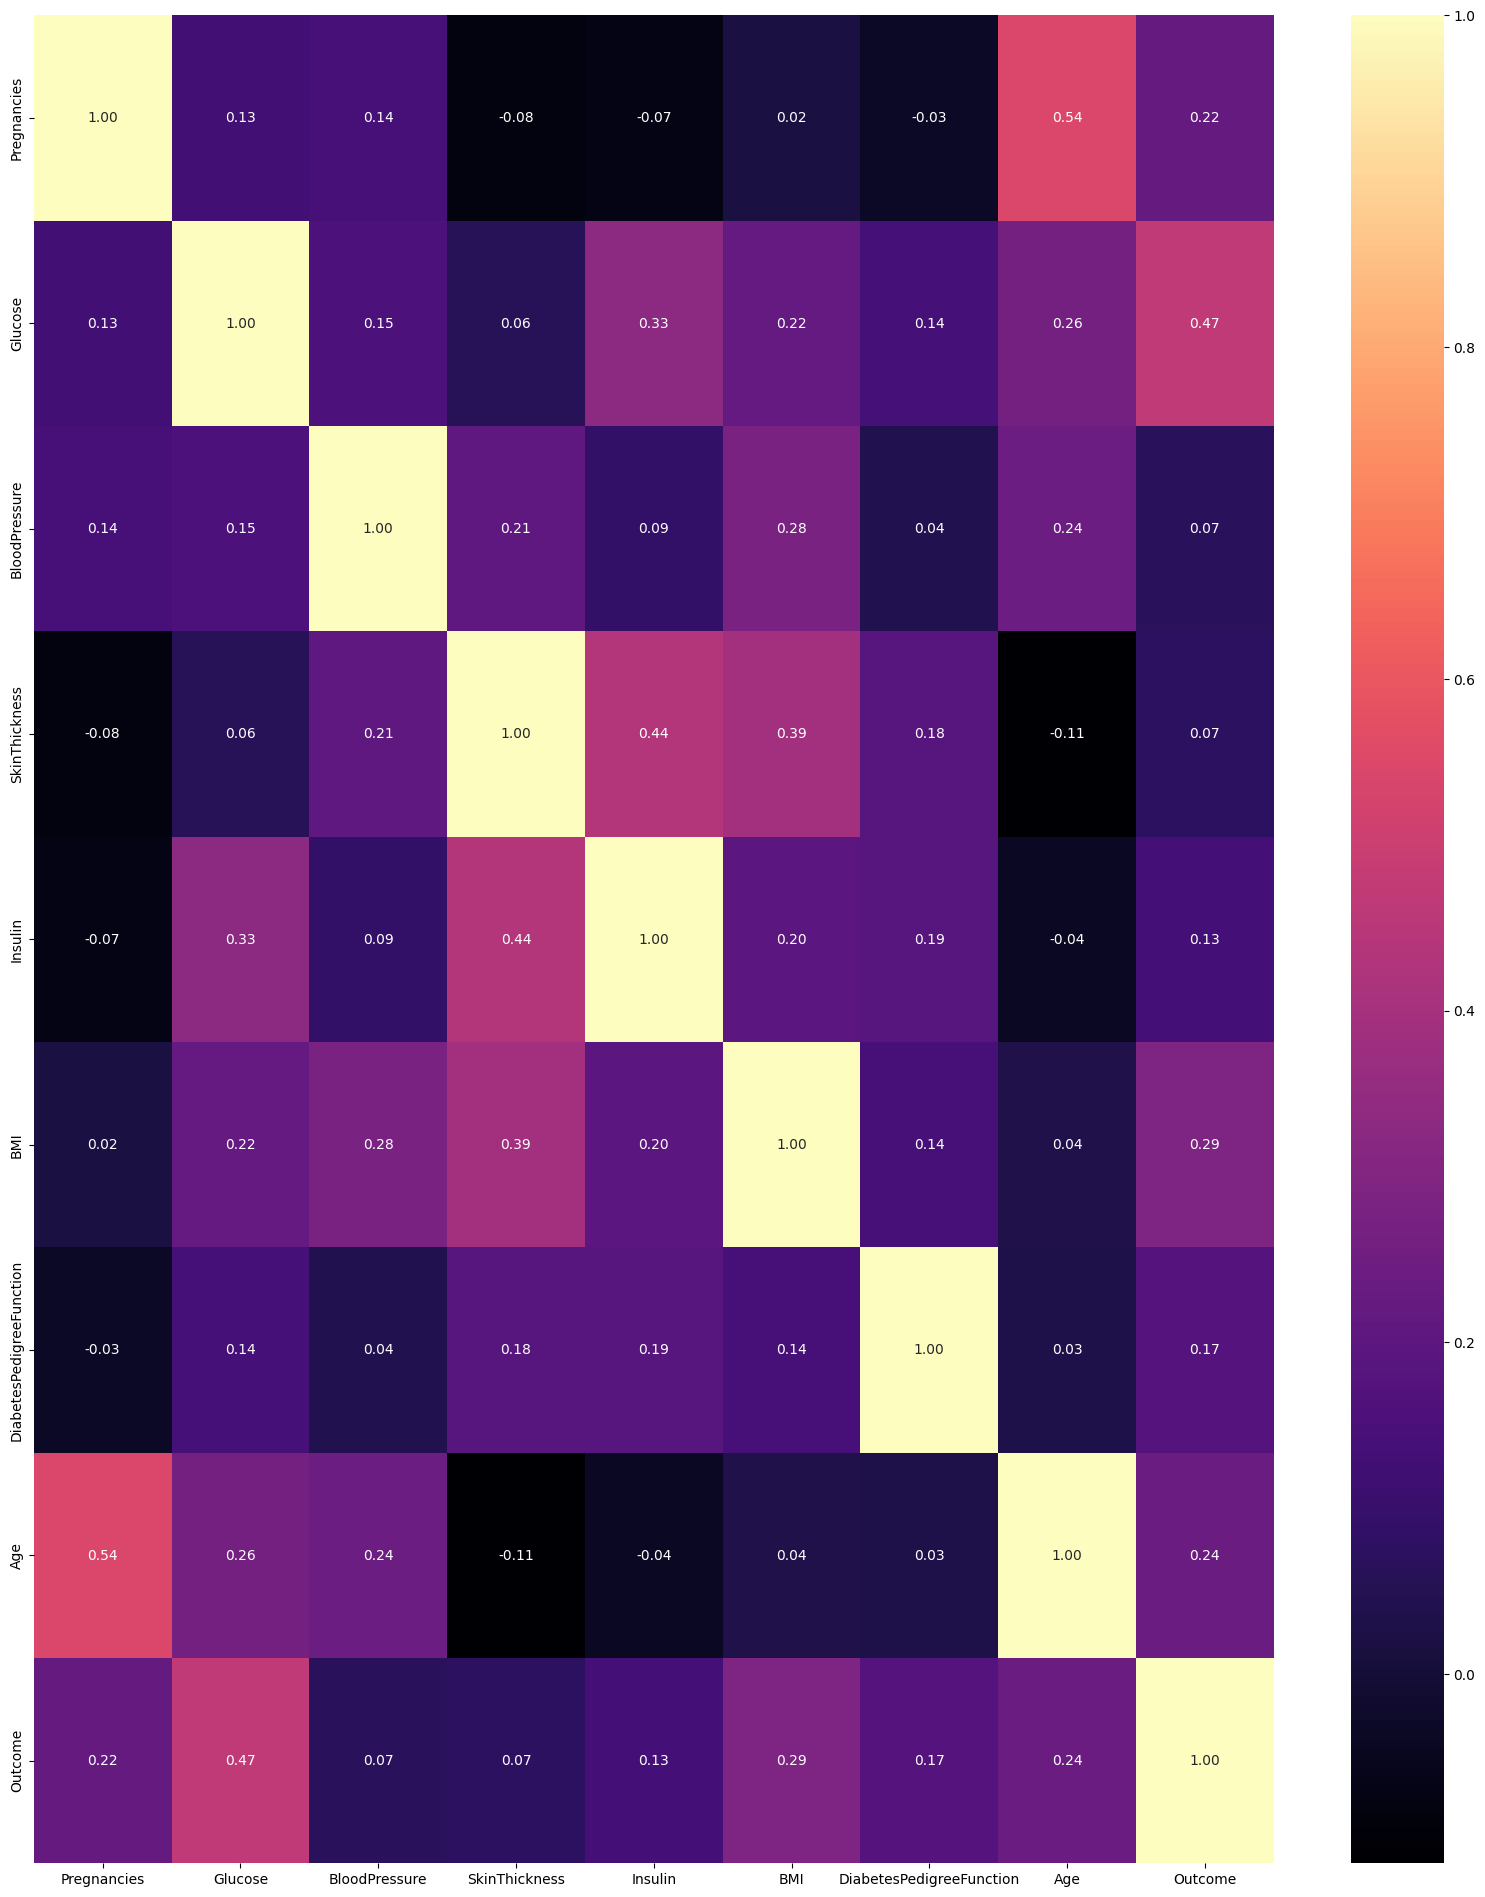

In [10]:
def CorrMatr(dff):
    f, ax = plt.subplots(1, 1, figsize=(20, 24))

    correlation_matrix = dff.corr()

    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma', ax=ax)

    plt.show()
CorrMatr(df)

In [11]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

Матрица диаграмм рассеивания

<Figure size 600x400 with 0 Axes>

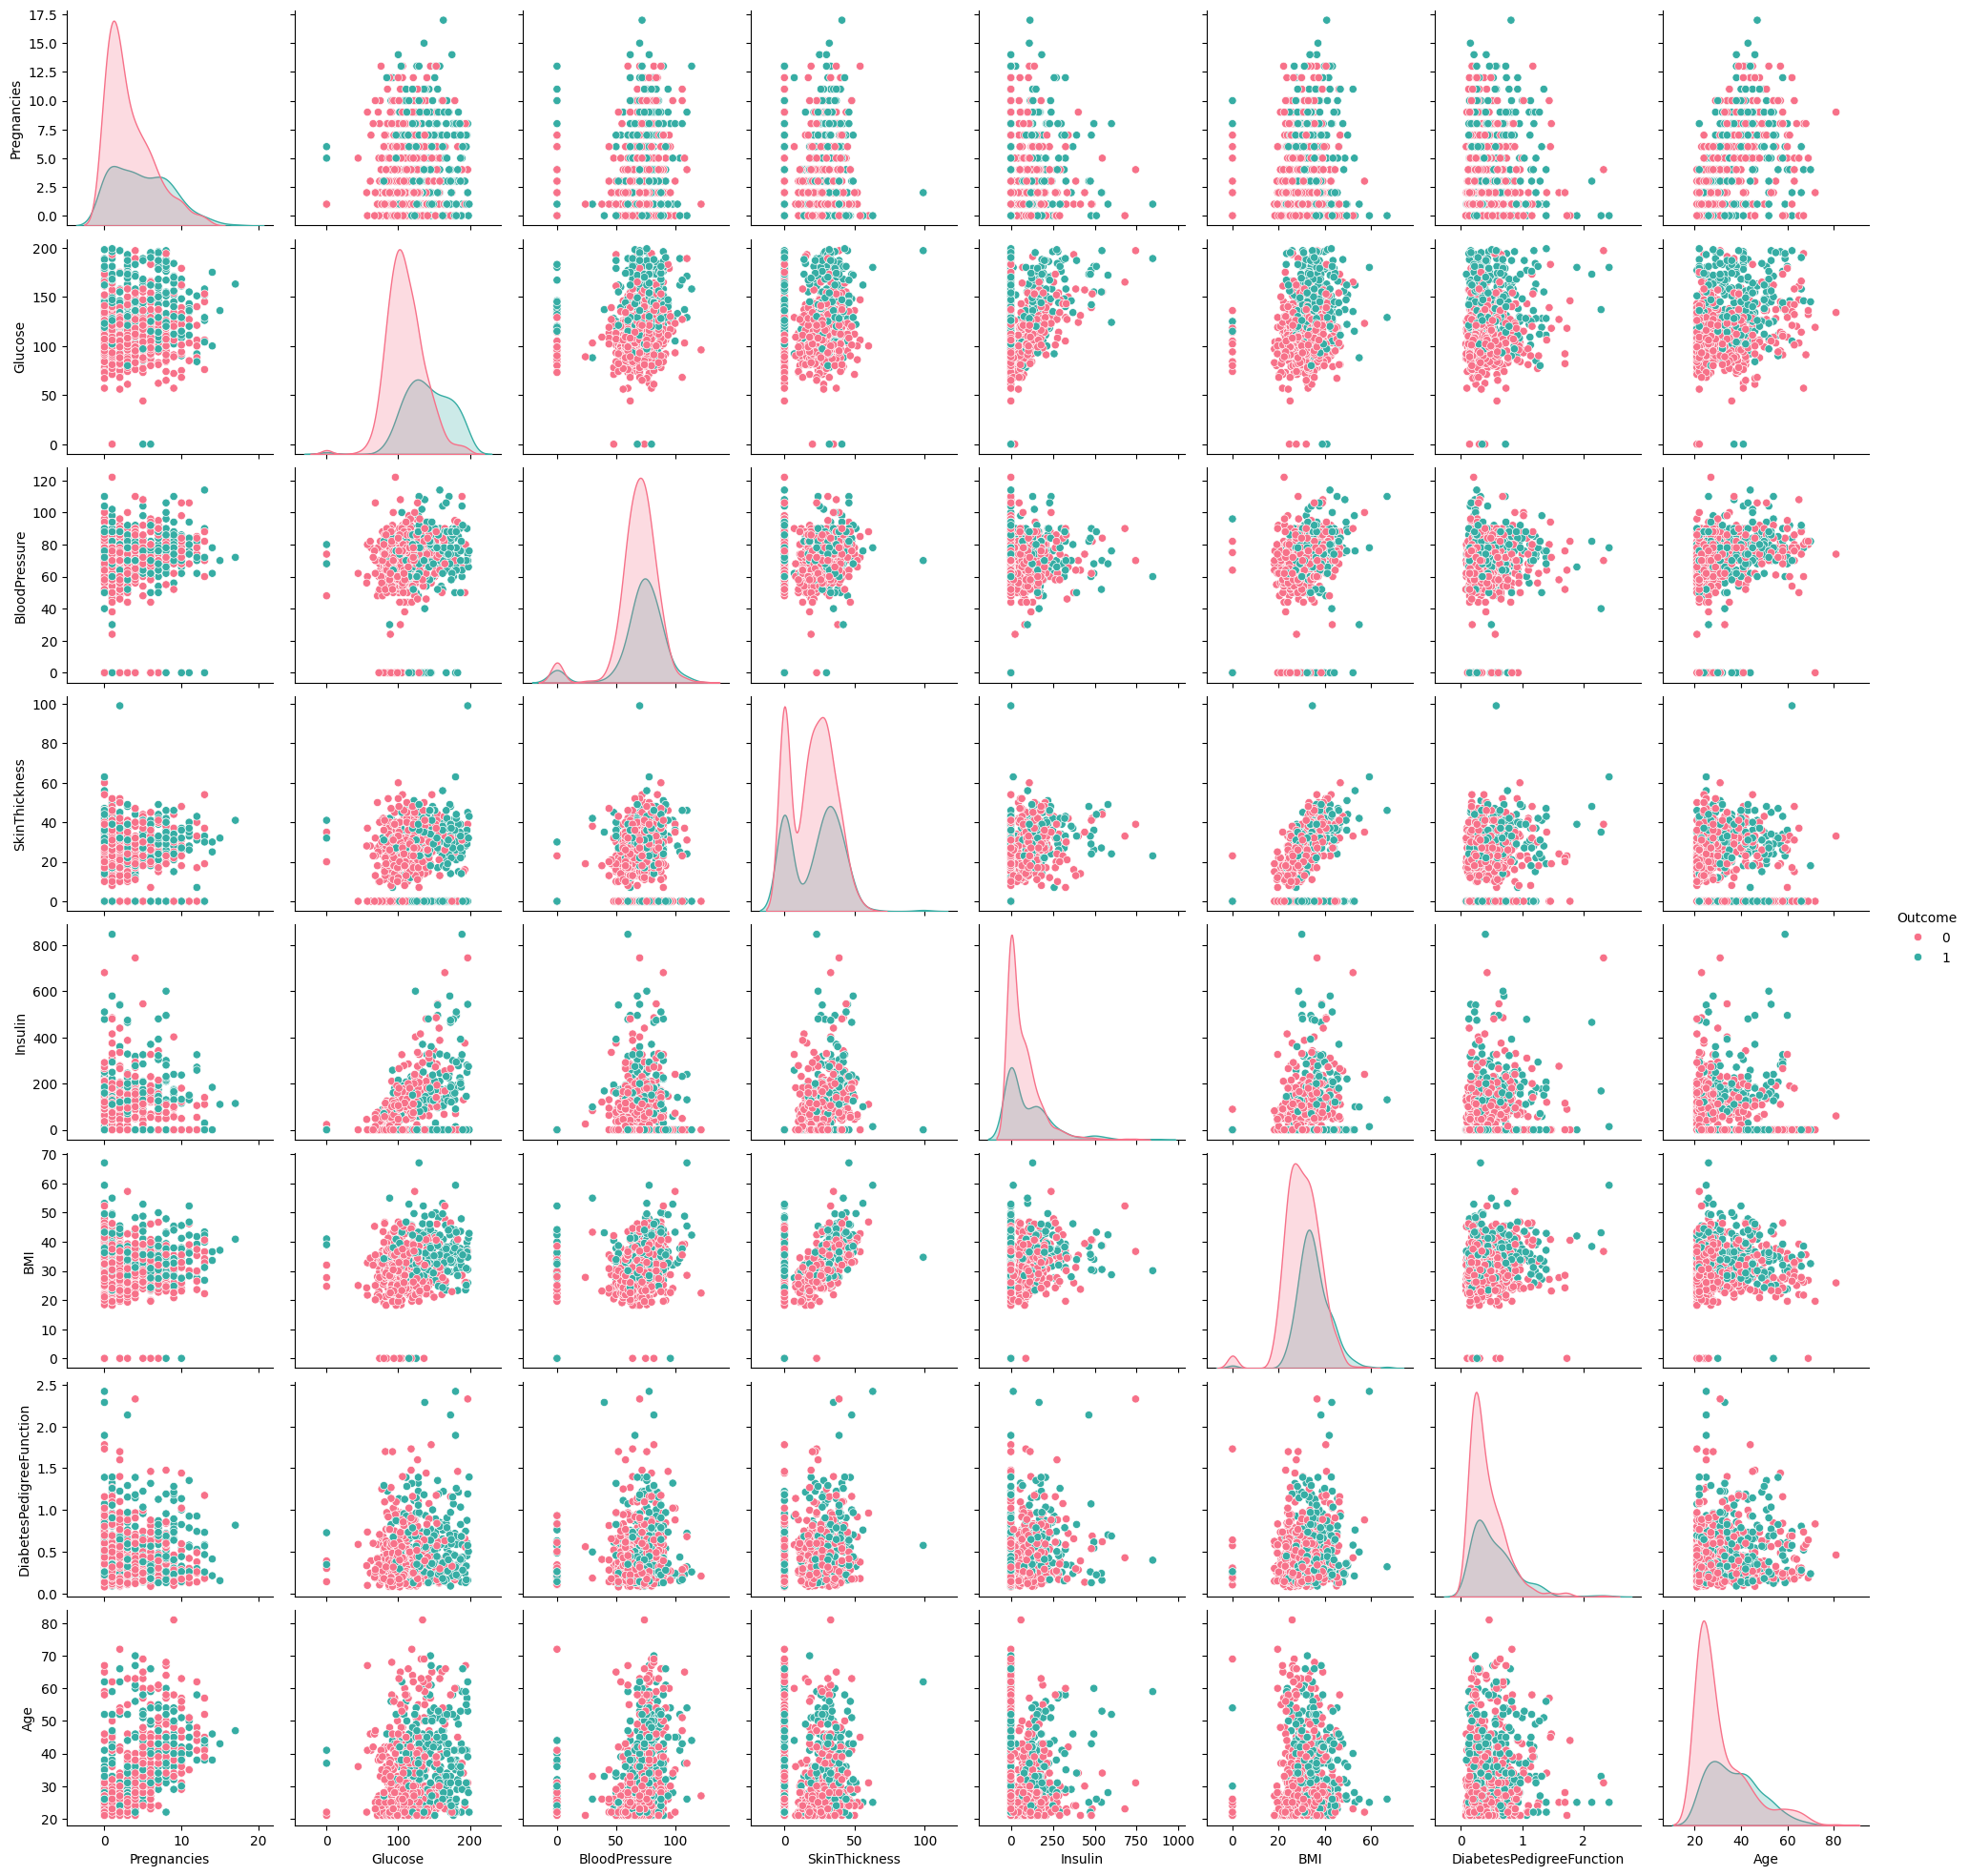

In [12]:
plt.figure(figsize=(6, 4))
sns.pairplot(df, hue="Outcome", palette="husl")
plt.show()

Графики для понимания, обладают ли признаки предсказательной силой

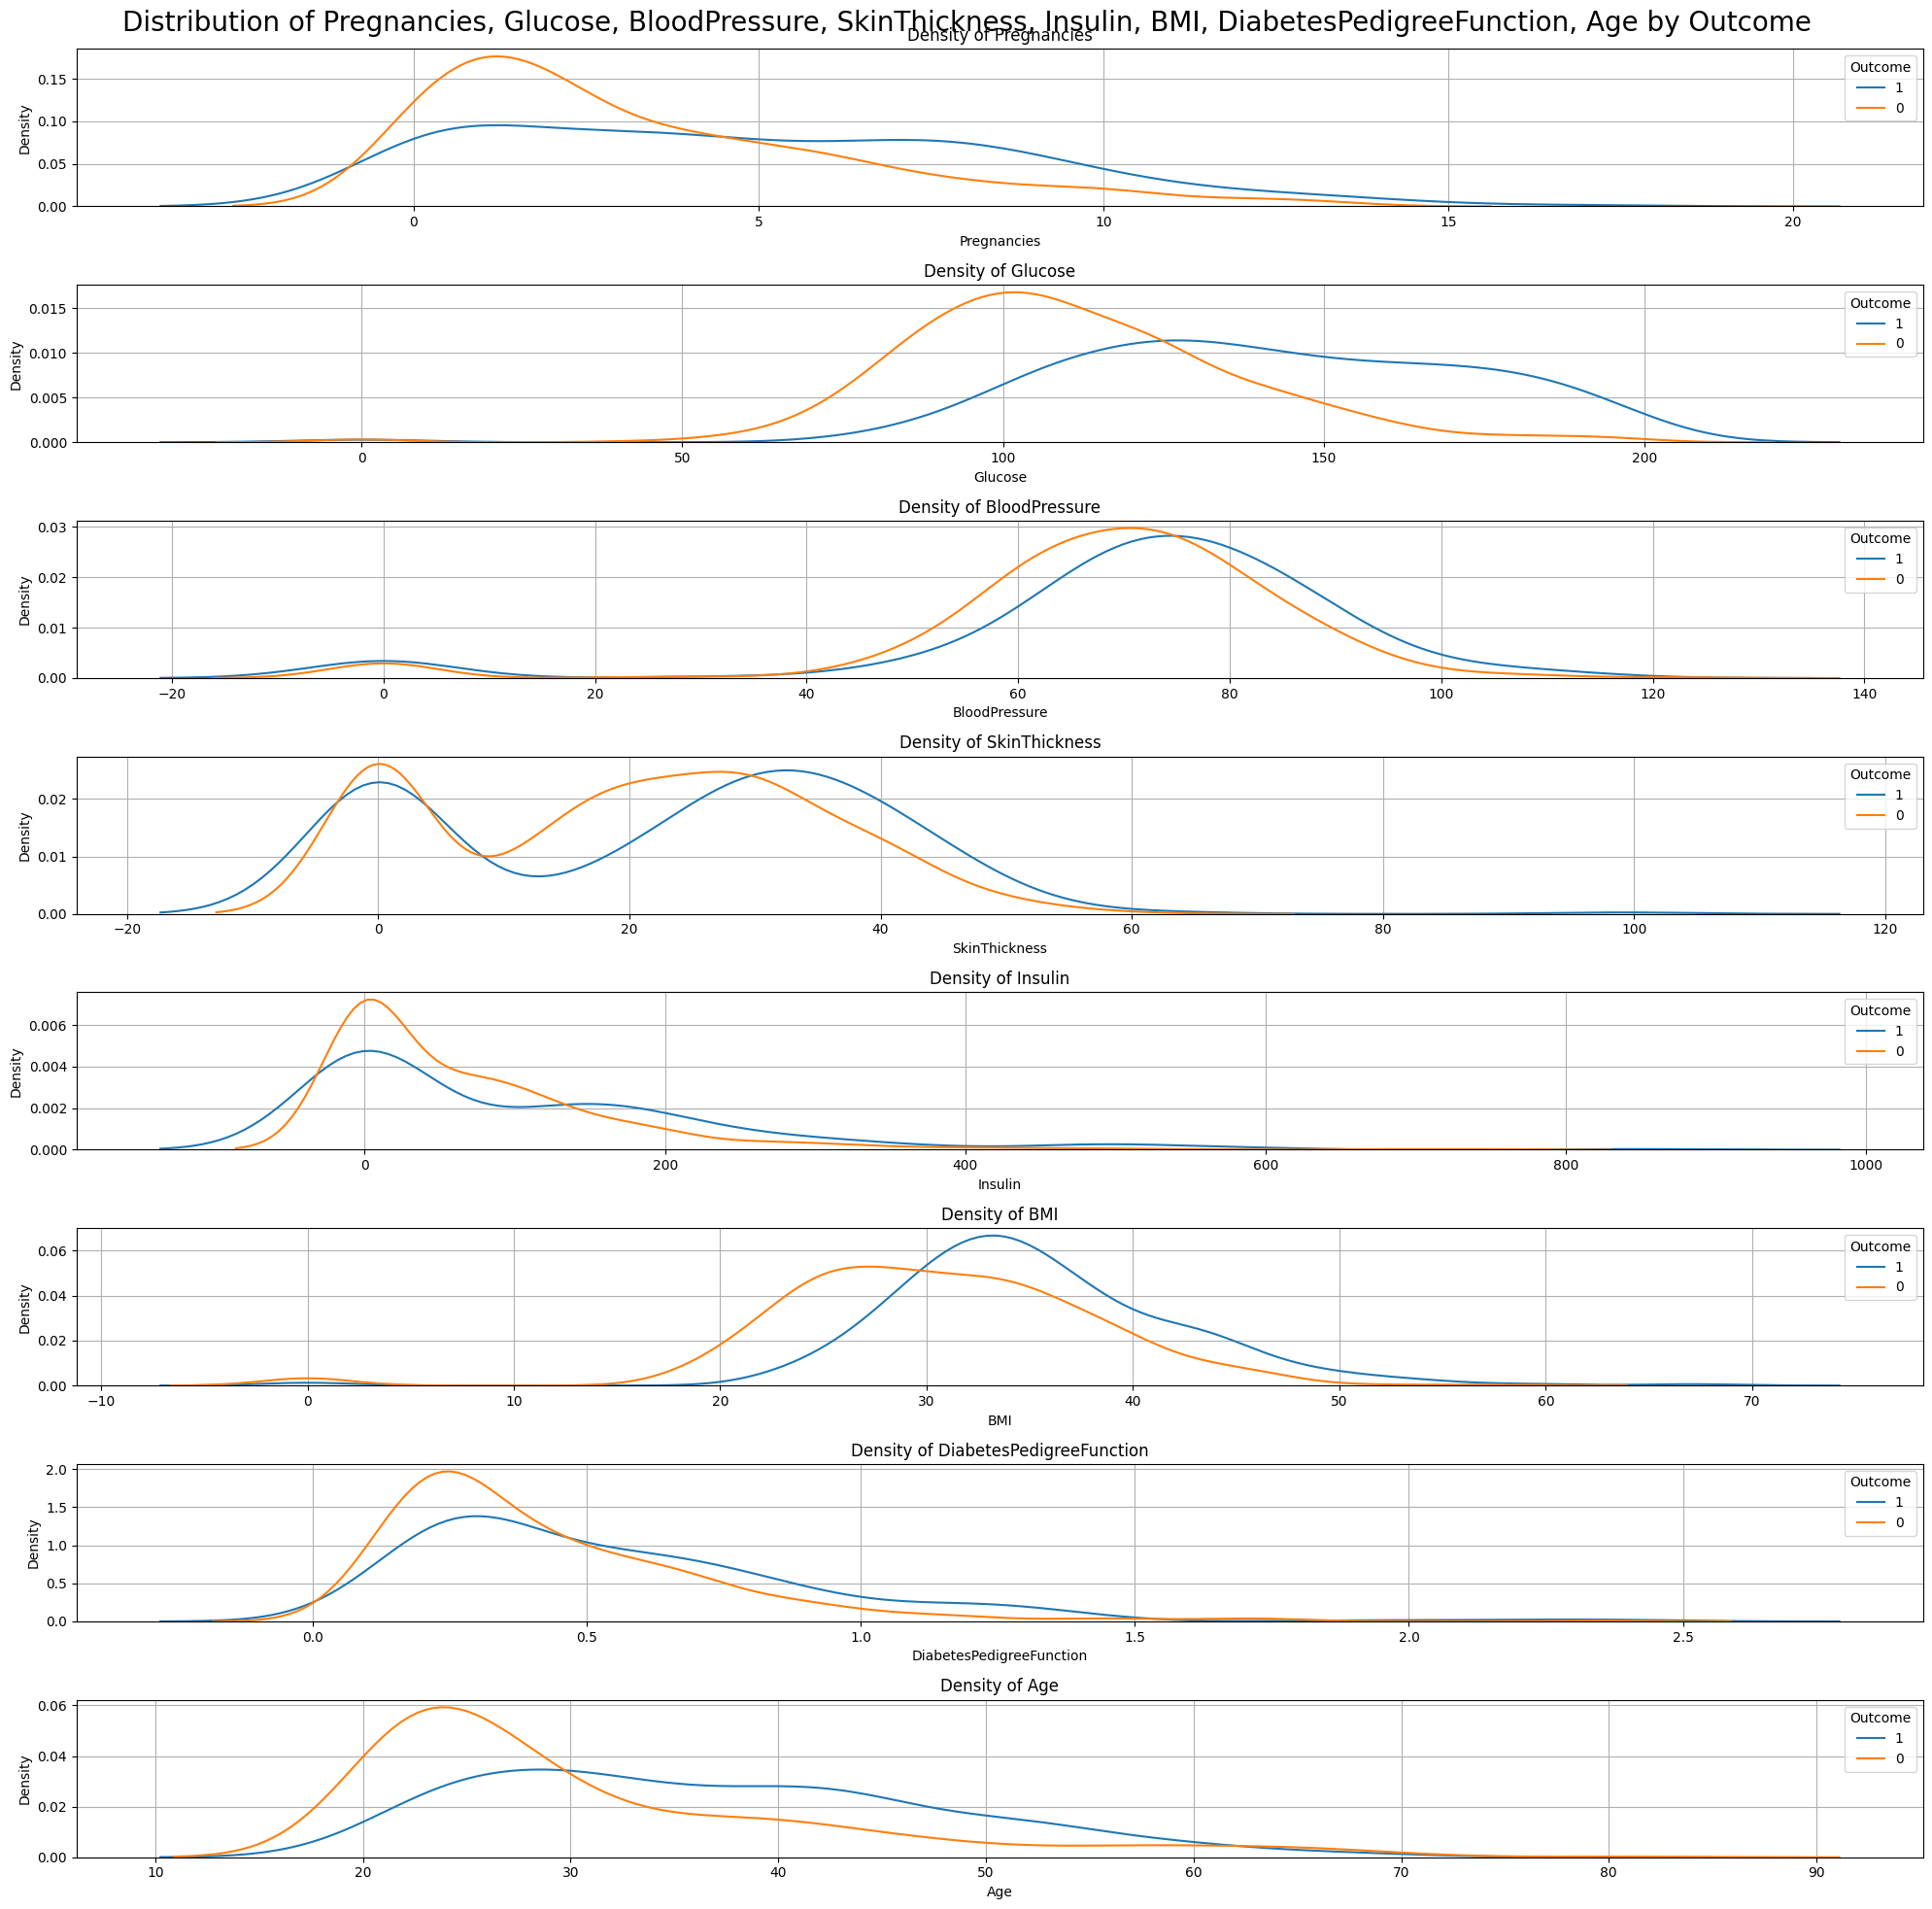

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_for_columns(df, cat, num_columns, figsize=(20, 20)):

    fig, ax = plt.subplots(nrows=len(num_columns), ncols=1, sharex=False, sharey=False, figsize=figsize)# распаковываем  кортеж в переменные figи ax.
    fig.suptitle(f"Distribution of {', '.join(num_columns)} by {cat}", fontsize=20)# получаем объект рисунка и массив подграфиков,где первое число - количество строк,второе - столбцов, sharex, sharey задают нужно ли разделять ось между подграфиками
    # Проверяем, если передан только один столбец, то ax будет не массивом, а одним объектом
    if len(num_columns)==1:
        ax=[ax] 

    # графики плотности для каждого столбца
    for i, num in enumerate(num_columns):
        ax[i].title.set_text(f'Density of {num}')
        for category in df[cat].unique():
            sns.kdeplot(df[df[cat] == category][num], label=category, ax=ax[i])
        ax[i].grid(True)
        ax[i].legend(title=cat)

    plt.tight_layout()
    plt.show()

cat = "Outcome"
num_columns =[
'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']  # Список столбцов для построения графиков
plot_distribution_for_columns(df, cat, num_columns)

Ящики с усами

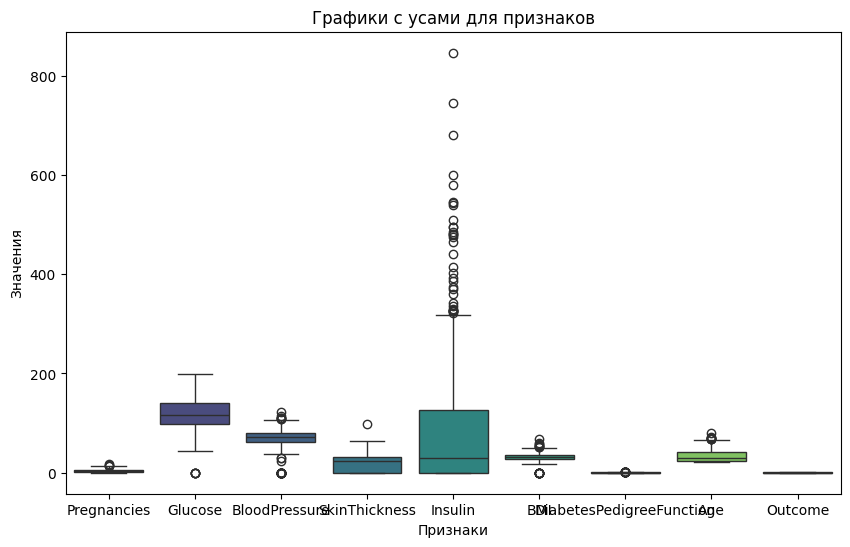

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='viridis')
plt.title('Графики с усами для признаков')
plt.xlabel('Признаки')
plt.ylabel('Значения')
plt.show()

# Моделирование

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
models = {
    "LogisticRegression": { # Логистическая регрессия
        "model": LogisticRegression(),
        "params": {
            
            "C": [0.01, 0.1, 1, 10], # обратное значение силы регуляризации. меньшие значения указывают на более сильную регуляризацию
            "penalty": ["l1", "l2"], #  параметр регуляризации
            "solver": ["lbfgs", "liblinear"] #оптимизация
        }
    },
    "KNearestNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7], #количество ближайших соседей
            "weights": ["uniform", "distance"], #параметр, который определяет, как вес должен распределяться между значениями соседей
            "p": [1, 2] #метрика для вычисления расстояний
        }
    },
    "SupportVectorClassifier": {
        "model": SVC(probability=True),
        "params": {
            "C": [1, 10],
            "kernel": ["linear", "rbf"], #ядро
            "gamma": ["scale"] #  параметр, определяющий степень влияния между обучающими образцами. Чем ниже его значение, тем больше радиус влияния образцов на формирование решающей границы, что делает её более гладкой
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini"],  # rритерий разделения узлов дерева (коэффициент Джини)
            "max_depth": [5, 7],  # максимальная глубина дерева
            "min_samples_split": [2, 4],  # минимальное количество образцов, необходимое для разделения узла
            "min_samples_leaf": [1, 2]  #минимальное количество образцов, необходимое для того, чтобы узел стал листом
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200],  # количество деревьев в лесу
            "max_depth": [5, None], 
            "min_samples_split": [2, 4],
            "min_samples_leaf": [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(),
        "params": {
            "n_estimators": [100, 200],  #количество деревьев в ансамбле
            "max_depth": [3, 5],  # максимальная глубина деревьев
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0],  # доля выборки, используемая для обучения каждого дерева
            "colsample_bytree": [0.8, 1.0]  # доля признаков, используемых для обучения каждого дерева
        }
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(),
        "params": {
            "learning_rate": [0.05, 0.1],
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "min_samples_split": [2, 4],
            "min_samples_leaf": [1, 2],
            "max_features": [2, 3, 4],  # количество признаков, рассматриваемых при поиске лучшего разделения
            "subsample": [0.8, 1.0]  # доля выборки, используемая для обучения каждого дерева
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": [1e-9, 1e-10, 1e-11]  # параметр сглаживания дисперсии для стабилизации вычислений
        }
    }
}

Лучшие модели

In [25]:
best_models = []
for name, model_info in models.items():
    grid_search = GridSearchCV(
        model_info["model"],
        model_info["params"],
        cv=StratifiedKFold(n_splits=5),
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_models.append((name, grid_search.best_estimator_))
    print(f"{name} Тренировачная Accuracy: {grid_search.best_estimator_.score(X_train, y_train)}")

LogisticRegression Тренировачная Accuracy: 0.7736156351791531
KNearestNeighbors Тренировачная Accuracy: 0.7996742671009772
SupportVectorClassifier Тренировачная Accuracy: 0.7736156351791531
DecisionTreeClassifier Тренировачная Accuracy: 0.8371335504885994
RandomForestClassifier Тренировачная Accuracy: 1.0
XGBoost Тренировачная Accuracy: 0.9006514657980456
GradientBoostingClassifier Тренировачная Accuracy: 1.0
NaiveBayes Тренировачная Accuracy: 0.752442996742671


Фильтрация моделей

In [26]:
desired_names = [
    "RandomForestClassifier",
    "GradientBoostingClassifier",
    #"LogisticRegression",
    "KNearestNeighbors",
    #"SupportVectorClassifier",
    #"DecisionTreeClassifier",
    #"XGBoost",
    #"NaiveBayes"
]

new_models = [model for model in best_models if model[0] in desired_names]

Создание модели, которая объединяет несколько моделей

In [27]:

stacking_model = StackingClassifier(
    estimators=best_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
print("Точность ансамблевой модели на тренировочных данных:", stacking_model.score(X_train, y_train))

Точность ансамблевой модели на тренировочных данных: 0.9055374592833876


Метрики

In [32]:
best_model = grid_search.best_estimator_

y_pred = stacking_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Test Accuracy: 0.7597402597402597
Test ROC-AUC: 0.8314049586776859


Конвеер и GridSearchCV для настройки гиперпараметров

In [21]:
pipeline = Pipeline([
    ('resample', SMOTE(random_state=42)),
    ('scale', RobustScaler()),
    ('stacking', stacking_model)
])

param_grid = {
    'resample__sampling_strategy': ['auto', 0.5, 0.75],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'stacking__final_estimator__C': [0.1, 1.0, 10.0],
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('resample', SMOTE(random_state=42)),
                                       ('scale', RobustScaler()),
                                       ('stacking',
                                        StackingClassifier(cv=5,
                                                           estimators=[('LogisticRegression',
                                                                        LogisticRegression(C=1)),
                                                                       ('KNearestNeighbors',
                                                                        KNeighborsClassifier(n_neighbors=7,
                                                                                             p=1)),
                                                                       ('SupportVectorClassifier',
                                                                        SVC...
                                                                        GradientBoostingClassifier(learning_rate=0.05,
                                                                                                   max_depth=5,
                                                                                                   max_features=4,
                                                                                                   subsample=0.8)),
                                                                       ('NaiveBayes',
                                                                        GaussianNB())],
                                                           final_estimator=LogisticRegression()))]),
             n_jobs=-1,
             param_grid={'resample__sampling_strategy': ['auto', 0.5, 0.75],
                         'scale': [StandardScaler(), MinMaxScaler(),
                                   RobustScaler()],
                         'stacking__final_estimator__C': [0.1, 1.0, 10.0]},
             scoring='accuracy')

# Прогнозирование

Метрики лучшей модели

In [1]:
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support
           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Test Accuracy: 0.7662337662337663
Test ROC-AUC: 0.8253443526170798


Рок кривые

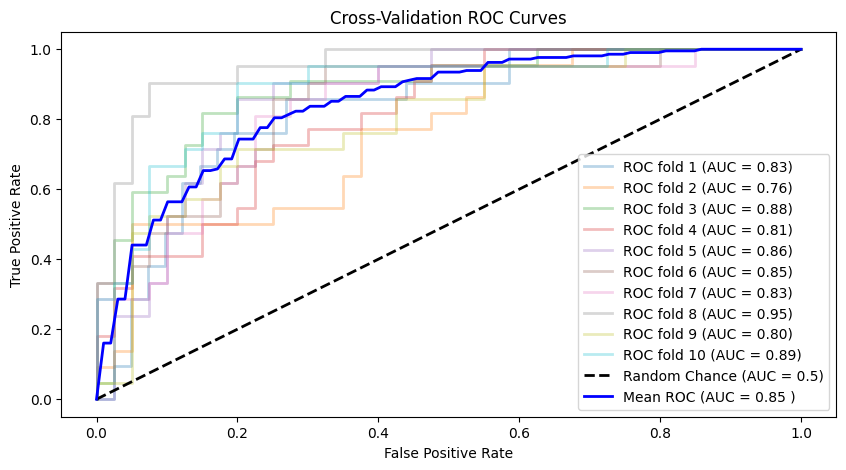

In [161]:
from sklearn import model_selection, metrics
import numpy as np
import matplotlib.pyplot as plt

cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)

tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10, 5), dpi=100)

i = 1
for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv = X_train.iloc[train_idx]
    y_train_cv = y_train.iloc[train_idx]
    X_test_cv = X_train.iloc[test_idx]
    y_test_cv = y_train.iloc[test_idx]

    best_model.fit(X_train_cv, y_train_cv)

    prediction = best_model.predict_proba(X_test_cv)

    fpr, tpr, _ = metrics.roc_curve(y_test_cv, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)

    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random Chance (AUC = 0.5)')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation ROC Curves')
plt.legend(loc="lower right")
plt.show()

Матрица ошибок

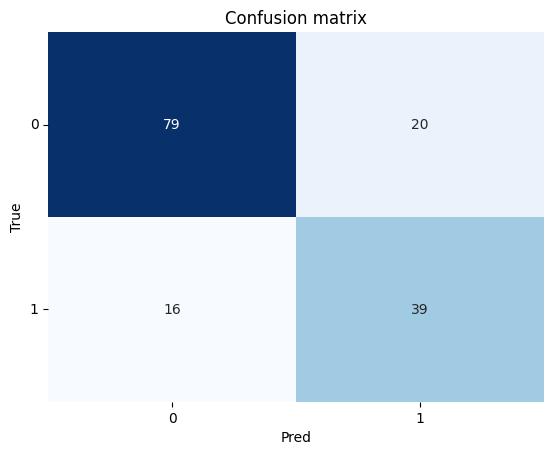

In [164]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)

plt.show()

In [165]:
y_test.shape

(154,)

In [166]:
y_pred.shape

(154,)

In [167]:
recall = metrics.recall_score(y_test, y_pred, average="weighted")
precision = metrics.precision_score(y_test, y_pred, average="weighted")

ROC-кривая и Precision-Recall

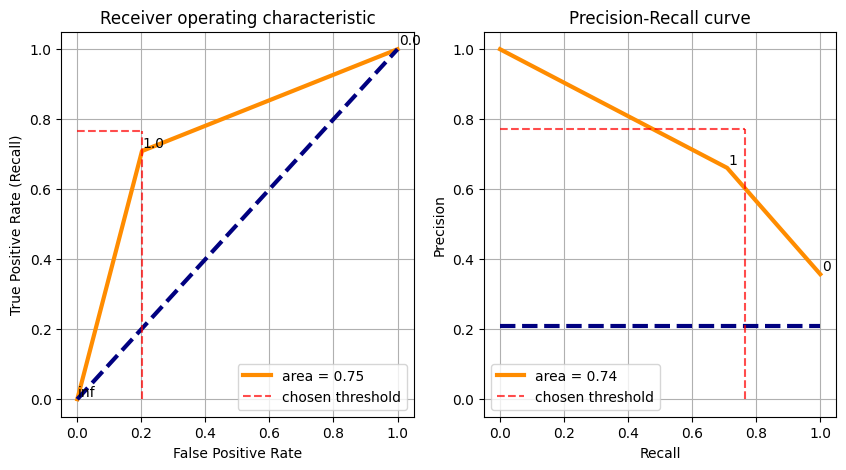

In [169]:
classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5),dpi=100)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)


thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next


precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]),
                    xytext=(recalls[i],precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
plt.show()